# La fonction Ishigami

On considère la fonction 
$$
g(X_1,X_2,X_3) = \sin(X_1)+a \sin (X_2)^2 + b X_3^4 \sin(X_1)
$$
pour tout $X_1,X_2,X_3\in[-\pi,\pi]$ où $a=7$ et $b=0.1$. 

On suppose que les variables sont indépendantes et suivent la loi uniforme entre $-\pi$ et $\pi$.

In [1]:
import openturns as ot
import openturns.viewer
import numpy as np

In [2]:
input_names = ["X1","X2","X3"]
g = ot.SymbolicFunction(input_names,["sin(X1)+7*sin(X2)^2+0.1*X3^4*sin (X1)"])
X = ot.ComposedDistribution ([ ot.Uniform (-np.pi , np.pi)] * 3 )
X.setDescription(input_names)

In [3]:
def ishigamisa(a,b):
    var = 1.0/2 + a**2/8 + b*np.pi**4/5 + b**2*np.pi**8/18
    S1 = (1.0/2 + b*np.pi**4/5+b**2*np.pi**8/50)/var
    S2 = (a**2/8)/var
    S3 = 0
    S13 = b**2*np.pi**8/2*(1.0/9-1.0/25)/var
    exact = {
            'expectation' : a/2, 
            'variance' : var,
            'S1' : (1.0/2 + b*np.pi**4/5+b**2*np.pi**8.0/50)/var,
            'S2' : (a**2/8)/var, 
            'S3' : 0,
            'S12' : 0,
            'S23' : 0,
            'S13' : S13,
            'S123' : 0,
            'ST1' : S1 + S13,
            'ST2' : S2,
            'ST3' : S3 + S13
            }
    return exact

a = 7.
b = 0.1
exact = ishigamisa(a,b)
exact

{'expectation': 3.5,
 'variance': 13.844587940719254,
 'S1': 0.31390519114781146,
 'S2': 0.4424111447900409,
 'S3': 0,
 'S12': 0,
 'S23': 0,
 'S13': 0.2436836640621477,
 'S123': 0,
 'ST1': 0.5575888552099592,
 'ST2': 0.4424111447900409,
 'ST3': 0.2436836640621477}

In [4]:
n = 10000
sampleX = X.getSample(n)
sampleY = g(sampleX)

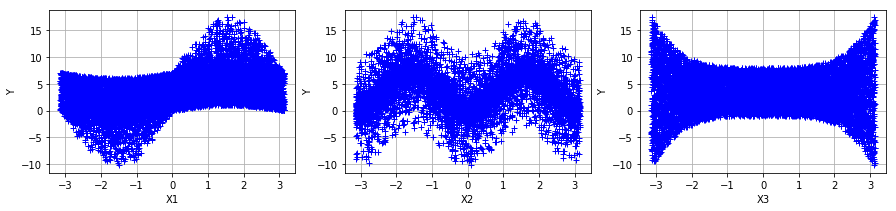

In [5]:
def plotXvsY(sampleX, sampleY, figsize=(15,3)):
    import pylab as pl
    dimX = sampleX.getDimension()
    inputdescr = sampleX.getDescription()
    fig = pl.figure(figsize=figsize)
    for i in range(dimX):
        ax = fig.add_subplot(1, dimX, i+1)
        graph = ot.Graph('', inputdescr[i], 'Y', True, '')
        cloud = ot.Cloud(sampleX[:,i],sampleY)
        graph.add(cloud)
        _ = ot.viewer.View(graph, figure=fig, axes=[ax])

plotXvsY(sampleX, sampleY)

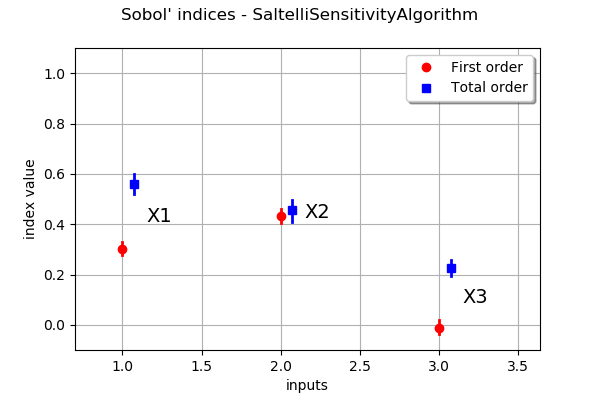

In [7]:
size = 10000
sie = ot.SobolIndicesExperiment(X, size, True)
inputDesign = sie.generate()
outputDesign = g(inputDesign)
sensitivityAnalysis = ot.SaltelliSensitivityAlgorithm(inputDesign, outputDesign, size)
graph = sensitivityAnalysis.draw()
graph

- On observe que la variable $X_1$, avec un indice de Sobol' total proche de 0.6, est la variable qui possède le plus d'impact par elle même ou par ses interactions. En effet, sont indice du premier ordre est proche de 0.3, ce qui implique que les interactions entre $X_1$ et les autres variables comptent pour approximativement 30% de la variance totale. 
- La variable $X_2$ possède un indice du premier ordre proche de l'indice total, ce qui implique qu'elle n'interagit pas avec les autres variables. Son indice total est approximativement égal à 0.4. 
- La variable $X_3$ possède un indice du premier ordre proche de zéro. Elle a un impact sur la variabilité de la sortie uniquement via ses interactions avec les autres variables. 